In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("categories_datasets/2_categories.csv")
df

,coord_x,coord_y,category
0,203.175900,185.107149,a
1,178.999121,205.587416,a
2,154.055528,192.339881,a
3,211.160136,209.633947,a
4,185.962405,191.852619,a
...,...,...,...
171,462.432157,242.373334,b
172,490.564537,235.205822,b
173,444.010085,262.168997,b
174,424.691566,226.654325,b


In [5]:
df["category"].unique()

array(['a', 'b'], dtype=object)

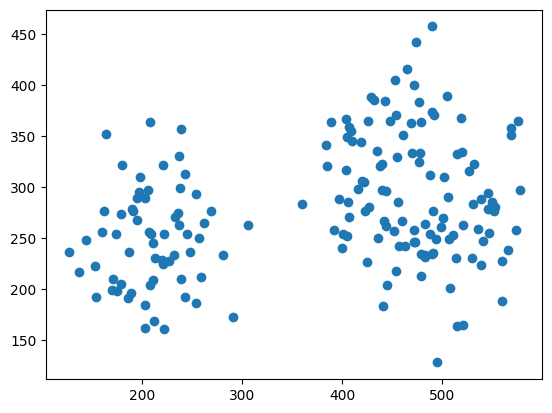

In [6]:
plt.scatter(df["coord_x"], df["coord_y"])

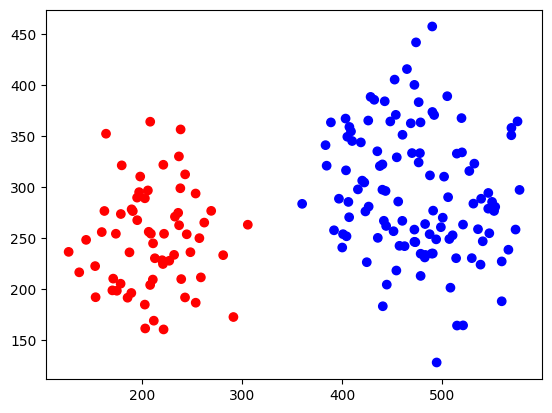

In [7]:
plt.scatter(df["coord_x"], df["coord_y"], c=df["category"].map({"a":"red", "b":"blue"}))

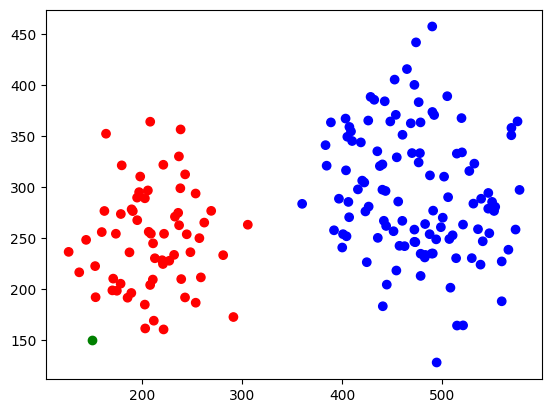

In [8]:
plt.scatter(df["coord_x"], df["coord_y"], c=df["category"].map({"a":"red", "b":"blue"}))
plt.scatter(150, 150, c="green")

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
model = DecisionTreeClassifier()
model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# X - variabilele de input / features
# y - variabilele de output / target (ce prezic) 

In [11]:
df.head(2)

,coord_x,coord_y,category
0,203.175900,185.107149,a
1,178.999121,205.587416,a


In [12]:
x = df[["coord_x", "coord_y"]]
y= df[["category"]]

In [13]:
model.fit(x.values, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


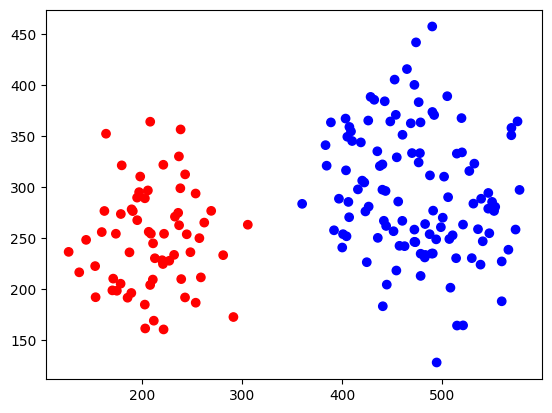

In [14]:
plt.scatter(df["coord_x"], df["coord_y"], c=df["category"].map({"a":"red", "b":"blue"}))

In [15]:
model.predict( [   [200, 250 ]   ]  )

array(['a'], dtype=object)

In [16]:
model.predict( [   [450, 300 ]   ]  )

array(['b'], dtype=object)

# pip install graphviz

In [17]:
import graphviz
from sklearn.tree import export_graphviz

In [18]:
exported_data =  export_graphviz(model, feature_names=["coord_x","coord_y"], class_names=["a", "b"])
exported_data

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="coord_x <= 333.067\\ngini = 0.46\\nsamples = 176\\nvalue = [63, 113]\\nclass = b"] ;\n1 [label="gini = 0.0\\nsamples = 63\\nvalue = [63, 0]\\nclass = a"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 113\\nvalue = [0, 113]\\nclass = b"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [19]:
tree_graph = graphviz.Source(exported_data)
tree_graph.render("2_categories", format="png")
tree_graph.view()

'2_categories.pdf'

In [20]:
ELEMENTS_NUMER = 500

SPLIT_VALUE = 333.067

linie_coord_x = np.ones(ELEMENTS_NUMER) * SPLIT_VALUE
linie_coord_y = np.arange(100, 100 + ELEMENTS_NUMER)

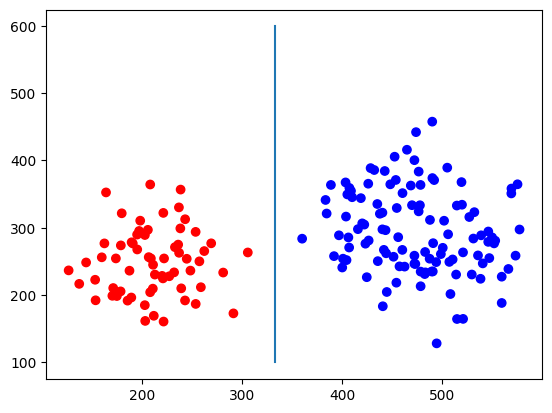

In [21]:
plt.scatter(df["coord_x"], df["coord_y"], c=df["category"].map({"a":"red", "b":"blue"}));
plt.plot(linie_coord_x, linie_coord_y)




In [22]:
df_4cat = pd.read_csv("categories_datasets/4_categories.csv")
df_4cat

,coord_x,coord_y,category
0,124.703038,350.089618,a
1,127.948668,417.534316,a
2,80.817806,395.823458,a
3,126.107518,383.713659,a
4,121.863843,355.151238,a
...,...,...,...
913,597.447179,80.049176,d
914,552.212837,77.267115,d
915,582.085716,58.248150,d
916,581.338270,55.497262,d


In [23]:
df_4cat["category"].unique()

array(['a', 'b', 'c', 'd'], dtype=object)

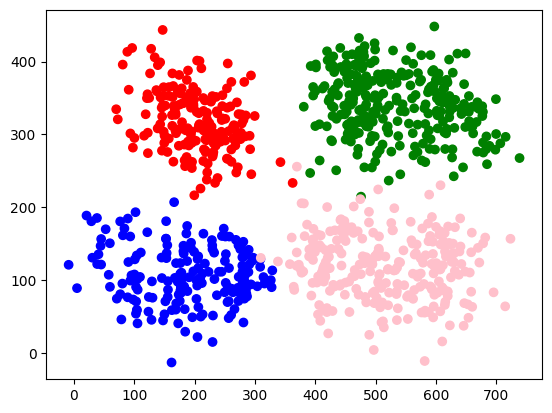

In [24]:
plt.scatter(df_4cat["coord_x"], df_4cat["coord_y"], c=df_4cat["category"].map({"a":"red", "b":"blue", "c":"green", "d":"pink"}));

In [25]:
x = df_4cat[["coord_x", "coord_y"]]
y= df_4cat[["category"]]

In [26]:
model_4cat = DecisionTreeClassifier()
model_4cat

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
model_4cat.fit(x, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
exported_data =  export_graphviz(model_4cat, feature_names=["coord_x","coord_y"], class_names=["a", "b", "c", "d"])
exported_data

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="coord_y <= 231.903\\ngini = 0.74\\nsamples = 918\\nvalue = [190, 180, 288, 260]\\nclass = c"] ;\n1 [label="coord_x <= 333.474\\ngini = 0.491\\nsamples = 442\\nvalue = [2, 180, 1, 259]\\nclass = d"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="coord_y <= 211.813\\ngini = 0.032\\nsamples = 183\\nvalue = [2, 180, 0, 1]\\nclass = b"] ;\n1 -> 2 ;\n3 [label="coord_x <= 309.371\\ngini = 0.011\\nsamples = 181\\nvalue = [0, 180, 0, 1]\\nclass = b"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 175\\nvalue = [0, 175, 0, 0]\\nclass = b"] ;\n3 -> 4 ;\n5 [label="coord_x <= 311.916\\ngini = 0.278\\nsamples = 6\\nvalue = [0, 5, 0, 1]\\nclass = b"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 0, 1]\\nclass = d"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 5\\nvalue = [0, 5, 0, 0]\\nclass = b"] ;\n5 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 2\\nvalue = 

In [29]:
tree_graph = graphviz.Source(exported_data)
tree_graph.render("4_categories", format="png")
tree_graph.view()

'4_categories.pdf'

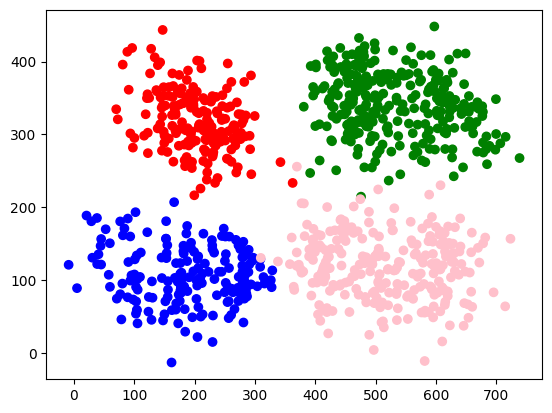

In [30]:
plt.scatter(df_4cat["coord_x"], df_4cat["coord_y"], c=df_4cat["category"].map({"a":"red", "b":"blue", "c":"green", "d":"pink"}));

In [31]:
ELEMENTS_NUMER = 800

SPLIT_VALUE = 231.903

prima_linie_coord_x = np.arange(0, ELEMENTS_NUMER) 
prima_linie_coord_y = np.ones(ELEMENTS_NUMER) * SPLIT_VALUE

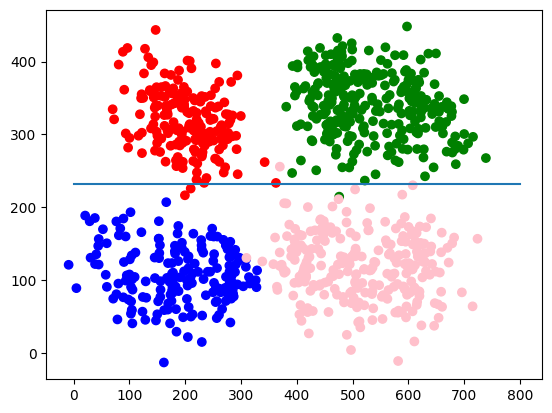

In [32]:
plt.scatter(df_4cat["coord_x"], df_4cat["coord_y"], c=df_4cat["category"].map({"a":"red", "b":"blue", "c":"green", "d":"pink"}));
plt.plot(prima_linie_coord_x, prima_linie_coord_y)

In [33]:
ELEMENTS_NUMER = 334

SPLIT_VALUE = 333.474

a_doua_linie_coord_x =  np.ones(ELEMENTS_NUMER) * SPLIT_VALUE

a_doua_linie_coord_y = np.arange(0, ELEMENTS_NUMER) 

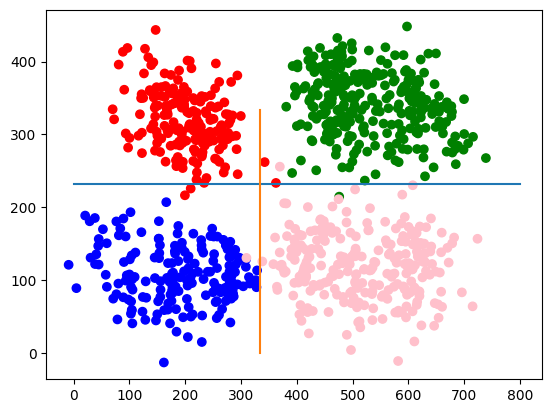

In [34]:
plt.scatter(df_4cat["coord_x"], df_4cat["coord_y"], c=df_4cat["category"].map({"a":"red", "b":"blue", "c":"green", "d":"pink"}));
plt.plot(prima_linie_coord_x, prima_linie_coord_y)
plt.plot(a_doua_linie_coord_x, a_doua_linie_coord_y)